In [1]:
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler


In [2]:
from pysr import PySRRegressor

In [3]:
import pysr
pysr.install()

[ Info: Julia version info


Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: macOS (arm64-apple-darwin21.2.0)
  uname: Darwin 21.2.0 Darwin Kernel Version 21.2.0: Sun Nov 28 20:29:10 PST 2021; root:xnu-8019.61.5~1/RELEASE_ARM64_T8101 x86_64 i386
  CPU: Apple M1: 
              speed         user         nice          sys         idle          irq
       #1    24 MHz      44164 s          0 s      29679 s     378879 s          0 s
       #2    24 MHz      41452 s          0 s      27066 s     384132 s          0 s
       #3    24 MHz      34831 s          0 s      21231 s     396588 s          0 s
       #4    24 MHz      31081 s          0 s      17017 s     404551 s          0 s
       #5    24 MHz     106320 s          0 s       5263 s     341066 s          0 s
       #6    24 MHz     103531 s          0 s       3790 s     345329 s          0 s
       #7    24 MHz      76804 s          0 s       2716 s     373131 s          0 s
       #8    24 MHz      68801 s          0 s      

[ Info: Julia executable: /Applications/Julia-1.7.app/Contents/Resources/julia/bin/julia
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: /Users/festabu/miniforge3/envs/native/bin/python
│     libpython: /Users/festabu/miniforge3/envs/native/lib/libpython3.9.dylib
│ Python:
│     python: /Users/festabu/miniforge3/envs/native/bin/python
└     libpython: 
/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/pysr/sr.py:318: UserWarning: 
Your Python version is statically linked to libpython. For example, this could be the python included with conda, or maybe your system's built-in python.
This will still work, but the precompilation cache for Julia will be turned off, which may result in slower startup times on the initial pysr() call.

To install a Python version that is dynamically linked to libpython, pyenv is recommended (https://github.com/pyenv/pyenv). With pyenv, you can run: `PYTHO

In [3]:
df_central_log_pairplot = pd.read_csv ('df_central_log_pairplot.csv') # df here read from the csv in previous line

In [4]:
df_central_log_pairplot.head(2)  

,half_radius,mstar_log,mhalo_log,spin,SFR_log,gas_fraction,Mhot_log,Cnfw,mbulge_log,Zcold,Zstar
0,2.332662,9.329776,11.109008,0.03407,-0.994489,0.212475,5.930248,21.8788,8.364093,0.206532,0.485612
1,2.922134,9.199695,11.068902,0.01407,-1.541164,0.181897,5.747273,23.4472,8.381359,0.099900,0.308089


In [5]:
df_sample = df_central_log_pairplot.sample(n = 1000, random_state = 2022) #choose a subset of data to use for pairplot

In [6]:
df_sample.shape

(1000, 11)

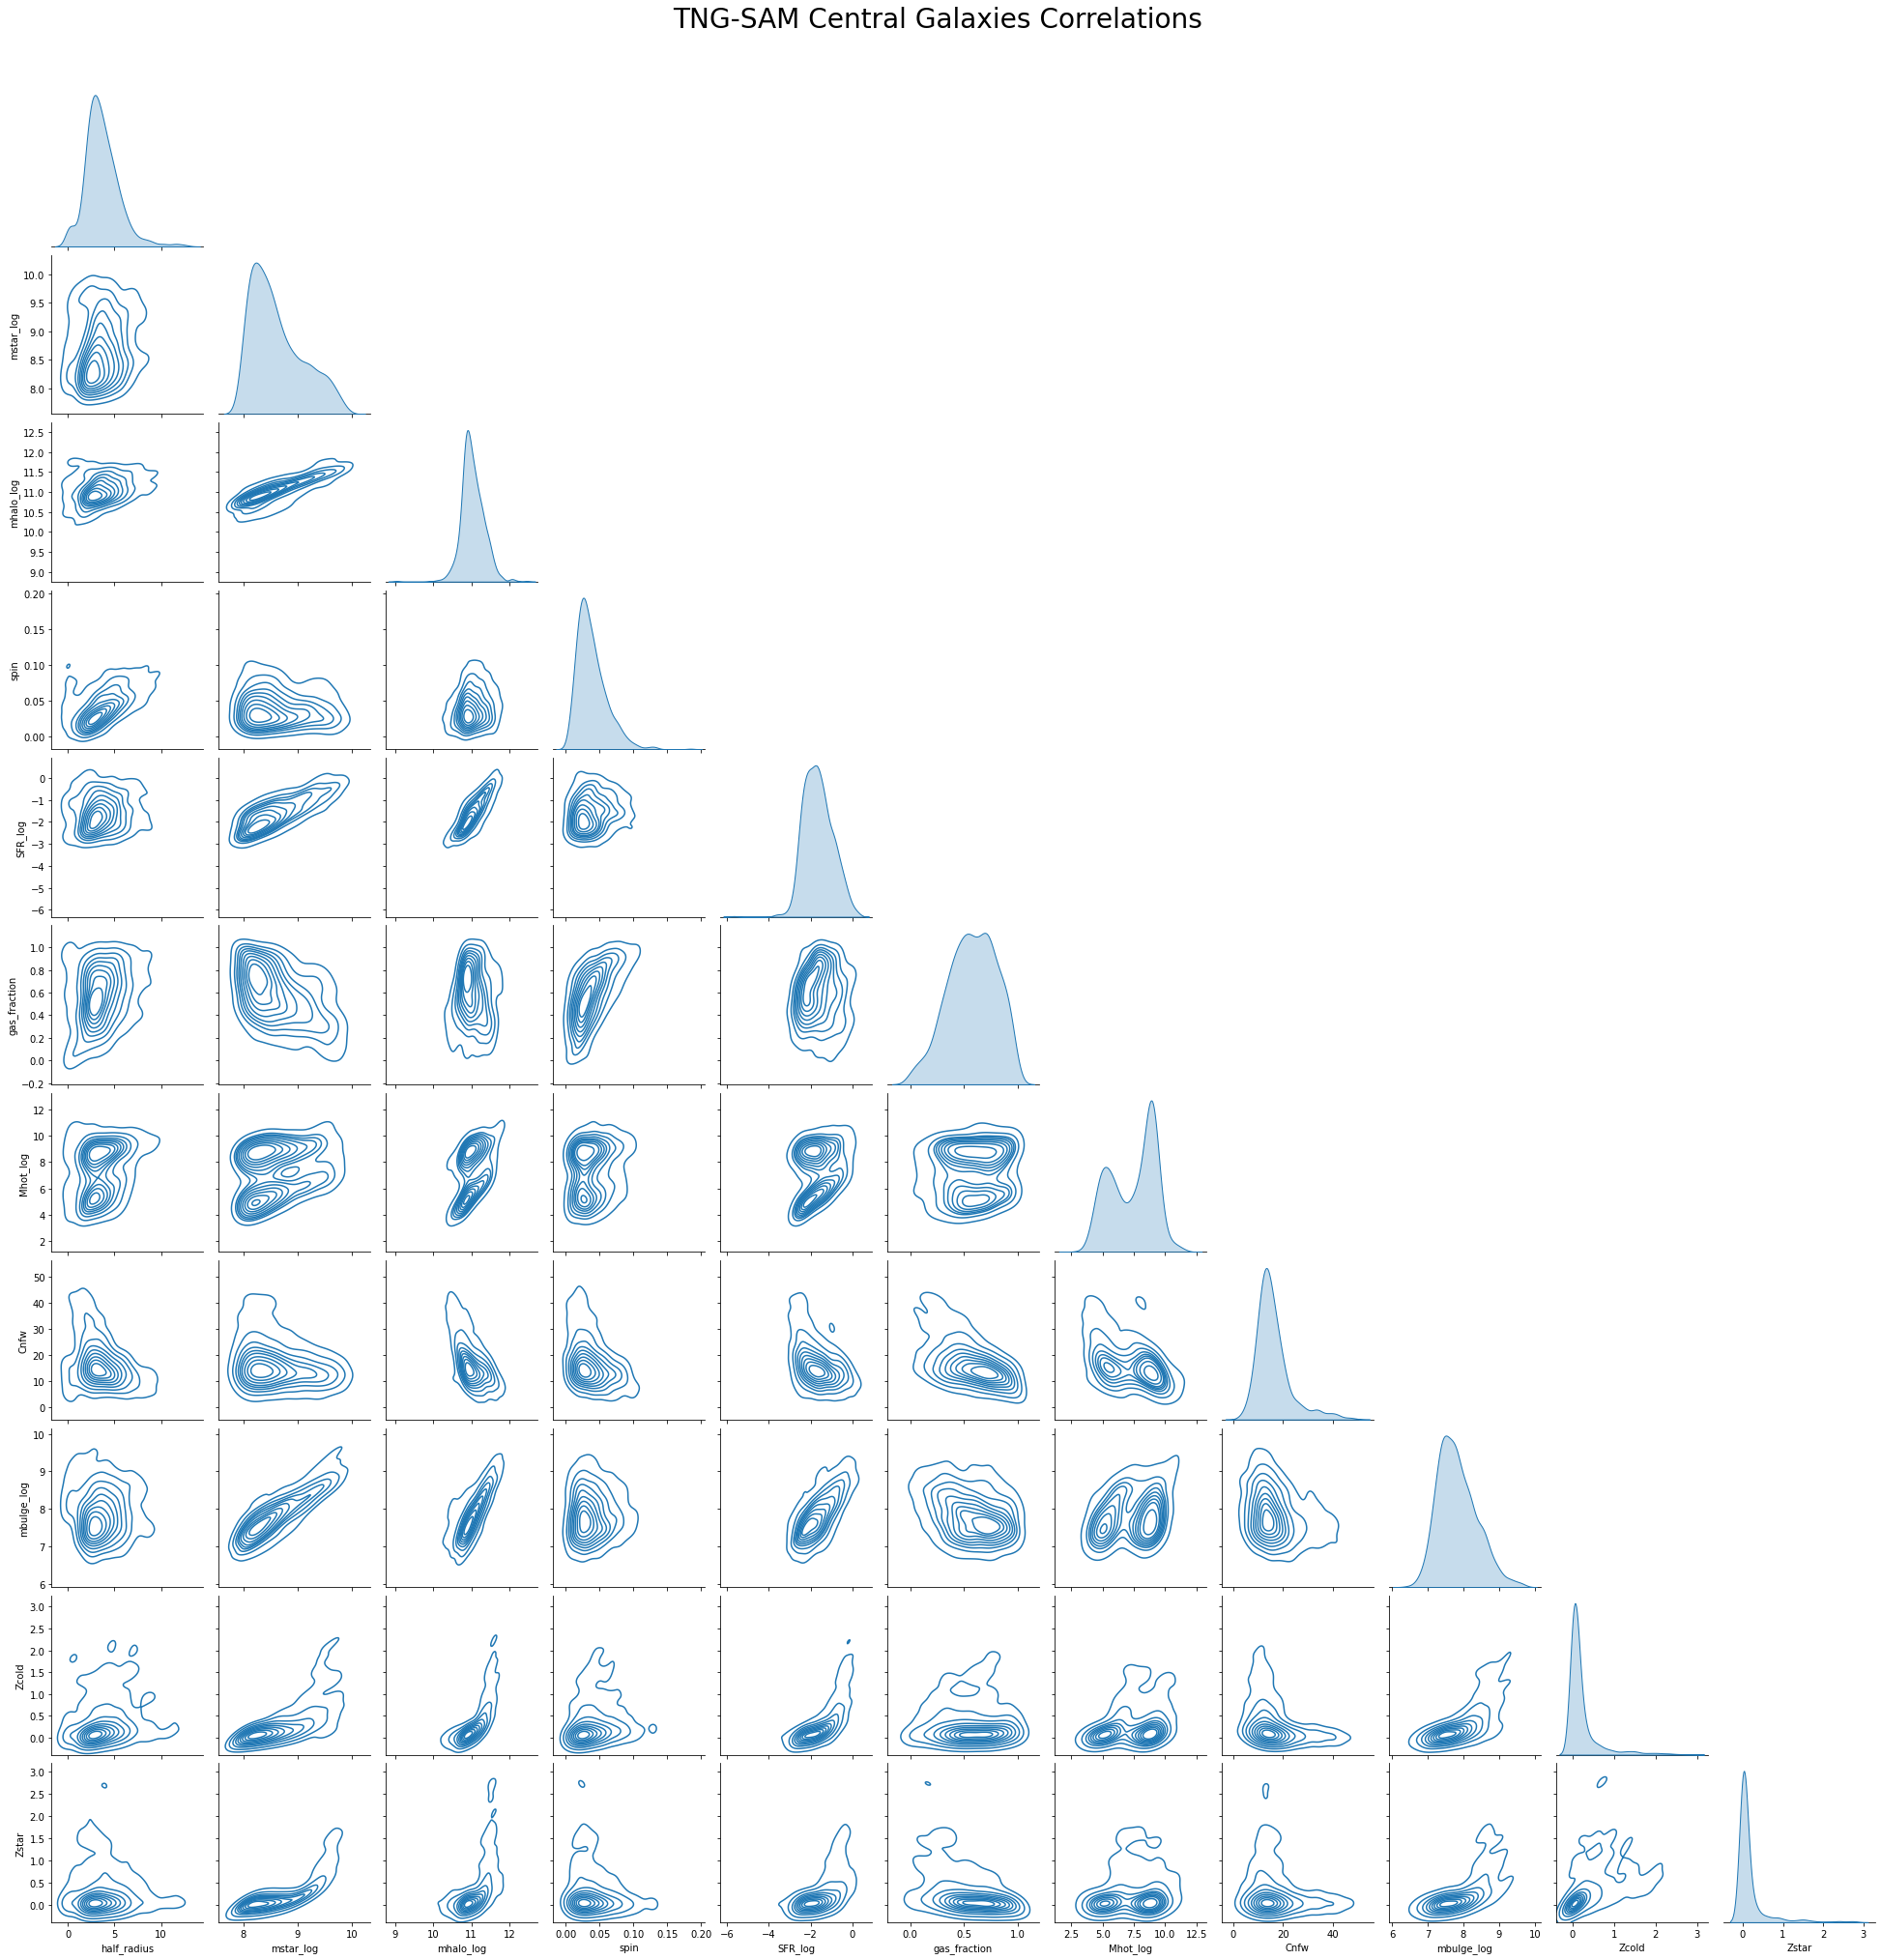

In [7]:
plot2=sns.pairplot(df_sample, kind='kde', corner=True)
plot2.fig.suptitle("TNG-SAM Central Galaxies Correlations ", y=1.03, fontsize=28) # y= some height>1
# plt.savefig("TNG-SAM_centrals_correlations_v2.pdf", dpi=500)
plt.show()



## <font color='violet'> Correlations 

In [8]:
df_central_log_pairplot.head(2)

,half_radius,mstar_log,mhalo_log,spin,SFR_log,gas_fraction,Mhot_log,Cnfw,mbulge_log,Zcold,Zstar
0,2.332662,9.329776,11.109008,0.03407,-0.994489,0.212475,5.930248,21.8788,8.364093,0.206532,0.485612
1,2.922134,9.199695,11.068902,0.01407,-1.541164,0.181897,5.747273,23.4472,8.381359,0.099900,0.308089


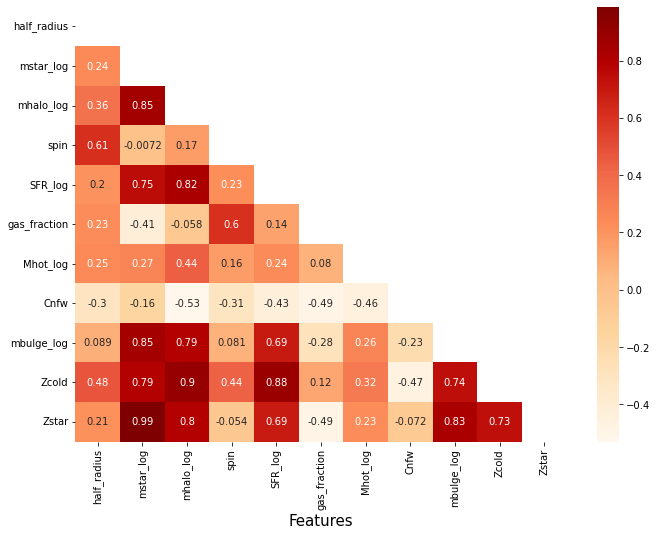

In [9]:
corr_df = df_central_log_pairplot.corr('spearman')
plt.figure(figsize=(11,8))
matrix = np.triu(corr_df) # take upper correlation matrix
sns.heatmap(corr_df, cmap="OrRd",annot=True, mask=matrix)
# plt.title("Spearman Correlation of TNG-SAM ", fontsize = 20)
plt.xlabel("Features", fontsize = 15)
# plt.savefig('TNG-SAM_Spearman_correlation_matrix_no_title.jpeg', dpi=500)
plt.show()

### <font color='violet'> Symbolic Regression example

In [10]:
X = 2 * np.random.randn(100, 5)
y = 2.5382 * np.cos(X[:, 3]) + X[:, 0] ** 2 - 0.5

In [11]:
X

array([[ 1.70743007e+00,  6.84438288e-01,  2.83530623e-02,
         9.13793267e-01,  1.18153170e+00],
       [ 1.41585447e+00,  2.13979829e+00,  6.13804165e-01,
         1.70326138e+00,  2.67834807e+00],
       [-2.89051663e+00,  1.17615443e+00, -1.85694840e+00,
        -7.56785494e-03, -9.24416484e-02],
       [-2.39149153e+00, -1.62312103e+00, -7.13771526e-01,
         1.29883569e+00,  1.16588082e+00],
       [ 2.04394638e+00, -1.95264406e+00, -8.16618817e-01,
         5.36629627e-01,  7.98324076e-01],
       [ 4.21712726e-01, -1.47838233e+00,  2.60418818e+00,
         5.46411872e-01, -2.03076525e+00],
       [-2.15623395e+00, -2.28273435e+00,  3.11607903e-01,
        -1.00967199e+00, -2.54184149e+00],
       [-6.64261456e-01, -2.34466690e+00,  6.95271698e-01,
         3.84400396e-01, -1.52014029e+00],
       [-2.09142508e+00,  1.02788445e+00, -3.03667995e+00,
        -4.85564217e+00, -2.85374420e-01],
       [-3.75482150e+00, -8.22067164e-01,  4.42562569e+00,
        -2.28173183e+00

In [12]:
X[:, 3]

array([ 0.91379327,  1.70326138, -0.00756785,  1.29883569,  0.53662963,
        0.54641187, -1.00967199,  0.3844004 , -4.85564217, -2.28173183,
       -0.8747778 ,  0.20724414,  2.29094644, -0.54471357, -1.10397358,
        0.39996562,  0.4541465 ,  2.36805587, -1.94283923, -0.5366752 ,
       -0.23451274,  0.87829032,  1.15783741,  3.09229839, -0.97295637,
        0.22846618, -3.25833443,  1.63446542, -0.53129328,  2.72630707,
        4.98454318, -2.41968103,  3.08768911, -0.13046799,  1.13487341,
        3.32267025,  0.33403664,  0.2468559 , -3.65421816, -1.77488989,
       -2.16845538, -1.92526829, -0.40098028,  0.1516925 ,  1.29673066,
        1.7793655 ,  1.41660986, -2.26177682,  0.3614128 , -0.07216787,
        0.4430677 , -3.28035702,  2.69041072,  0.65788246, -3.10186944,
       -0.46367265, -2.74920076,  1.92492033,  0.06729932,  0.55211235,
       -0.78655877,  0.09961271, -0.3314164 ,  1.07396231,  1.62934093,
        3.30011033, -1.26113269,  2.2038448 , -1.0195372 ,  2.43

In [13]:
model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",  # Custom operator (julia syntax)
    ],
    model_selection="best",
    loss="loss(x, y) = (x - y)^2",  # Custom loss function (julia syntax)
)

In [14]:
model.fit(X, y)

/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/pysr/sr.py:318: UserWarning: 
Your Python version is statically linked to libpython. For example, this could be the python included with conda, or maybe your system's built-in python.
This will still work, but the precompilation cache for Julia will be turned off, which may result in slower startup times on the initial pysr() call.

To install a Python version that is dynamically linked to libpython, pyenv is recommended (https://github.com/pyenv/pyenv). With pyenv, you can run: `PYTHON_CONFIGURE_OPTS="--enable-shared" pyenv install 3.9.10` to install Python 3.9.10 with dynamic linking.

To silence this warning, you can run pysr.silence_julia_warning() after importing pysr.
  warnings.warn(
  Activating project at `~/.julia/environments/pysr-0.7.9`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/pysr-0.7.9/Project.toml`
  No Changes to `~

Started!

Cycles per second: 2.770e+04
Head worker occupation: 7.9%
Progress: 143 / 500 total iterations (28.600%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           5.257e+01  3.409e-07  4.18148
3           3.392e+00  1.370e+00  (x0 * x0)
5           3.363e+00  4.379e-03  ((x0 * x0) + -0.17188919)
6           1.326e+00  9.308e-01  (cos(x3) + (x0 * x0))
8           2.422e-01  8.499e-01  ((cos(x3) * 2.4181979) + (x0 * x0))
10          0.000e+00  1.151e+01  (((cos(x3) * 2.5382009) + (x0 * x0)) + -0.5000001)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 2.630e+04
Head worker occupation: 5.1%
Progress: 268 / 500 total iterations (53.600%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           5.257e+01  3.409e-07  4.18148
3           3.392e+00  1.370e+00  (x0 * x0)
5           3.363e+00  4.379e-03  ((x0 * x0) + -0.17188919)
6           1.326e+00  9.30

PySRRegressor.equations = [
	   pick     score                                           equation  \
	0        0.000000                                            4.18148   
	1        1.370335                                          (x0 * x0)   
	2        0.004379                          ((x0 * x0) + -0.17188919)   
	3        0.930787                              (cos(x3) + (x0 * x0))   
	4        0.849854                ((cos(x3) * 2.4181979) + (x0 * x0))   
	5  >>>>       inf  (((cos(x3) * 2.5382009) + (x0 * x0)) + -0.5000...   
	
	        loss  complexity  
	0  52.569260           1  
	1   3.392144           3  
	2   3.362564           5  
	3   1.325668           6  
	4   0.242249           8  
	5   0.000000          10  
]

In [15]:
print(model)

PySRRegressor.equations = [
	   pick     score                                           equation  \
	0        0.000000                                            4.18148   
	1        1.370335                                          (x0 * x0)   
	2        0.004379                          ((x0 * x0) + -0.17188919)   
	3        0.930787                              (cos(x3) + (x0 * x0))   
	4        0.849854                ((cos(x3) * 2.4181979) + (x0 * x0))   
	5  >>>>       inf  (((cos(x3) * 2.5382009) + (x0 * x0)) + -0.5000...   
	
	        loss  complexity  
	0  52.569260           1  
	1   3.392144           3  
	2   3.362564           5  
	3   1.325668           6  
	4   0.242249           8  
	5   0.000000          10  
]


In [16]:
model.equations

,complexity,loss,score,equation,sympy_format,lambda_format
0,1,52.569260,0.000000,4.18148,4.18148000000000,PySRFunction(X=>4.18148000000000)
1,3,3.392144,1.370335,(x0 * x0),x0**2,PySRFunction(X=>x0**2)
2,5,3.362564,0.004379,((x0 * x0) + -0.17188919),x0**2 - 0.17188919,PySRFunction(X=>x0**2 - 0.17188919)
3,6,1.325668,0.930787,(cos(x3) + (x0 * x0)),x0**2 + cos(x3),PySRFunction(X=>x0**2 + cos(x3))
4,8,0.242249,0.849854,((cos(x3) * 2.4181979) + (x0 * x0)),x0**2 + 2.4181979*cos(x3),PySRFunction(X=>x0**2 + 2.4181979*cos(x3))
5,10,0.000000,inf,(((cos(x3) * 2.5382009) + (x0 * x0)) + -0.5000...,x0**2 + 2.5382009*cos(x3) - 0.5000001,PySRFunction(X=>x0**2 + 2.5382009*cos(x3) - 0....


In [17]:
model.predict(X)

array([ 3.96551477,  1.16940327, 10.39321448,  5.90104448,  5.85913956,
        1.84646641,  5.50001905,  2.29421494,  4.23642178, 11.9423993 ,
        2.91605548,  4.6645962 ,  2.09152158, 17.90553442, 19.37163077,
        2.67849943,  3.90941571, -2.12946494, -1.27010014,  4.77901396,
        7.68565436,  5.63984559, 25.42463792, -3.01141502,  3.4712179 ,
       28.35651959,  3.53265577,  2.75747022,  2.74916375, -2.41465872,
        1.9664917 , -0.27544077, -3.02007136,  2.55892245,  0.78177229,
        1.75101807,  3.09680611,  3.40178445,  8.72738394, -0.21029571,
        0.53333276,  7.38936139,  1.88852327,  2.05945541,  0.46884464,
        0.24486663,  5.84611296, 24.20197161, 12.59356643,  5.01287315,
        2.32244983,  0.74785445, -2.53525187,  3.06423171, -0.95324662,
        7.63184073, -1.24639658, -0.28949111,  2.24708207,  2.7079333 ,
        1.47177694,  2.34872969,  3.60858779,  1.25313599,  2.60136649,
       -1.18205329,  3.67727495,  7.83019446,  2.00121717, -1.51

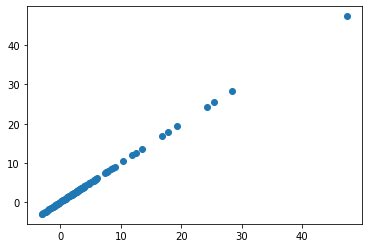

In [18]:
plt.scatter(y, model.predict(X))

### <font color='violet'> Normalize the df



### Normalized size

##### Rvir and Mvir:
So one way of defining halos is using a spherical overdensity. In this case the mass and radius are relate by Mhalo/(4/3 pi Rhalo^3) = Delta where Delta depends on the critical density of the Universe.  It could be 200\rho_crit or the virial definition is a function that depends on cossmology. The following code uses astropy cosmology to calculate \rho_crit and then can give Rvir(Mvir) or Mvir(Rvir)

In [24]:
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

def Delta(z,Om0=0.279,Ob0=0.046,h=0.7):
    #Bryan & Norman 99
    cosmo = FlatLambdaCDM(H0=100*h, Om0=Om0, Ob0=Ob0)
    x=cosmo.Om(z)-1
    return 18*np.pi**2+82*x-39*x**2

def rho_crit(z,Om0=0.279,Ob0=0.046,h=0.7):
    cosmo = FlatLambdaCDM(H0=100*h, Om0=Om0, Ob0=Ob0)
    return cosmo.critical_density(z).to(u.Msun/u.kpc**3).value

def rho_vir(z,Om0=0.279,Ob0=0.046,h=0.7):
    D=Delta(z,Om0=Om0,Ob0=Ob0,h=h)
    cosmo = FlatLambdaCDM(H0=100*h, Om0=Om0, Ob0=Ob0)
    rho_c = cosmo.critical_density(z).to(u.Msun/u.kpc**3).value
    return D*rho_c

def Rvir_to_Mvir(Rvir,z,Om0=0.279,Ob0=0.046,h=0.7):
    rho_v = rho_vir(z,Om0=Om0,Ob0=Ob0,h=h)
    return rho_v*4./3.*np.pi*Rvir**3   #Msun

def Mvir_to_Rvir(Mvir,z,Om0=0.279,Ob0=0.046,h=0.7):
    rho_v = rho_vir(z,Om0=Om0,Ob0=Ob0,h=h)
    return  (Mvir/(rho_v*4./3.*np.pi))**(1./3.)  #kpc

### <font color='violet'> Symbolic Regression using important features


In [11]:
# use only important features obtained from previous steps, X_imp, and y, for Symbolic Regression

X_imp = df_central_log_pairplot.loc[:, ['mstar_log', 'mhalo_log', 'spin', 'SFR_log', 'mbulge_log']]


y_imp = df_central_log_pairplot.loc[:,'half_radius']

In [ ]:
# from pysr import PySRRegressor
model_imp = PySRRegressor(
    niterations=1,
    binary_operators=["+", "*", "pow", ],
    unary_operators=["exp", "square", "cube"
        "inv(x) = 1/x",  # Custom operator (julia syntax)
    ],
    model_selection="best",
    loss="loss(x, y) = (x - y)^2",  # Custom loss function (julia syntax)
)

In [ ]:
model_imp.fit(X_imp, np.array(y_imp))

/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/pysr/sr.py:942: UserWarning: Resetting variable_names from X.columns
  warnings.warn("Resetting variable_names from X.columns")
/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/pysr/sr.py:974: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://pysr.readthedocs.io/en/latest/docs/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(
  Activating project at `~/.julia/environments/pysr-0.7.9`
   Resolving package versions...
  No Changes to `~/.julia/environments/pysr-0.7.9/Project.toml`
  No Changes to `~/.julia/environments/pysr-0.7.9/Manifest.toml`
  No Changes to `~/.j

In [7]:
print(model_imp)

PySRRegressor.equations = [
	   pick     score                                           equation  \
	0        0.000000                                          3.7083745   
	1        0.043273                           (mhalo_log + -7.3283157)   
	2  >>>>  0.143367                    ((spin * 46.38166) + 1.8971559)   
	3        0.006645               exp(mstar_log * (spin + 0.11186767))   
	4        0.053217     (mstar_log * ((spin * 5.441351) + 0.21884066))   
	5        0.016303  (((spin * 42.85944) + -15.081031) + (mhalo_log...   
	6        0.000909  ((spin + -9.0775) + (mhalo_log + ((spin * 5.08...   
	7        0.001527  (((mhalo_log * 0.2713313) + -12.036093) + (mha...   
	8        0.017939  ((((mbulge_log * -0.5163108) + -5.122901) + sp...   
	
	       loss  complexity  
	0  3.244988           1  
	1  2.975956           3  
	2  2.234084           5  
	3  2.219287           6  
	4  2.104271           7  
	5  2.036764           9  
	6  2.033065          11  
	7  2.026864          13

In [8]:
model_imp.equations

,complexity,loss,score,equation,sympy_format,lambda_format
0,1,3.244988,0.000000,3.7083745,3.70837450000000,PySRFunction(X=>3.70837450000000)
1,3,2.975956,0.043273,(mhalo_log + -7.3283157),mhalo_log - 7.3283157,PySRFunction(X=>mhalo_log - 7.3283157)
2,5,2.234084,0.143367,((spin * 46.38166) + 1.8971559),46.38166*spin + 1.8971559,PySRFunction(X=>46.38166*spin + 1.8971559)
3,6,2.219287,0.006645,exp(mstar_log * (spin + 0.11186767)),exp(mstar_log*(spin + 0.11186767)),PySRFunction(X=>exp(mstar_log*(spin + 0.111867...
4,7,2.104271,0.053217,(mstar_log * ((spin * 5.441351) + 0.21884066)),mstar_log*(5.441351*spin + 0.21884066),PySRFunction(X=>mstar_log*(5.441351*spin + 0.2...
5,9,2.036764,0.016303,(((spin * 42.85944) + -15.081031) + (mhalo_log...,1.5508034*mhalo_log + 42.85944*spin - 15.081031,PySRFunction(X=>1.5508034*mhalo_log + 42.85944...
6,11,2.033065,0.000909,((spin + -9.0775) + (mhalo_log + ((spin * 5.08...,mhalo_log + 5.0808406*mstar_log*spin + spin - ...,PySRFunction(X=>mhalo_log + 5.0808406*mstar_lo...
7,13,2.026864,0.001527,(((mhalo_log * 0.2713313) + -12.036093) + (mha...,1.2713313*mhalo_log + 5.090001*mstar_log*spin ...,PySRFunction(X=>1.2713313*mhalo_log + 5.090001...
8,15,1.955433,0.017939,((((mbulge_log * -0.5163108) + -5.122901) + sp...,-0.5163108*mbulge_log + mhalo_log + 5.3416047*...,PySRFunction(X=>-0.5163108*mbulge_log + mhalo_...


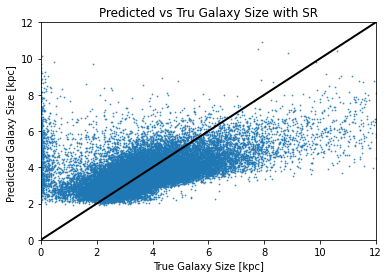

In [26]:
plt.scatter(y_imp, model_imp.predict(X_imp), s=3, marker='.', alpha=0.7)
plt.plot([0.0, 12], [0.0, 12], color = 'black', linewidth = 2)
plt.axis([0.0,12, 0.0,12])
plt.title('Predicted vs True Galaxy Size with SR')
plt.xlabel('True Galaxy Size [kpc]')
plt.ylabel('Predicted Galaxy Size [kpc] ')
# plt.savefig('SR_predicted vs true gal size.jpeg', dpi=500)
plt.show()

In [11]:
plt.scatter?